# Fletcher Final
Topic modeling dialogue blocks from Sean Hannity and Rachel Maddow, from Jan 2016 to Feb 2018

### General Imports

In [1]:
from python_modules_local.ends import show # my custom function for displaying pandas dataframes 

from time import time

import pandas as pd 
import numpy as np
import re, pickle
import matplotlib
import matplotlib.pyplot as plt

% matplotlib inline

### Data

In [2]:
master_extraction = pickle.load(open('master_extraction.p','rb')).dropna()

host_mask =(
           (master_extraction.Speaker == 'MADDOW')|
           (master_extraction.Speaker == 'HANNITY')
                  )

In [3]:
master_extraction[host_mask].Speaker.value_counts()

MADDOW     13367
HANNITY    10728
Name: Speaker, dtype: int64

In [4]:
show(master_extraction)

,transcriptid,blockid,Speaker,Content,Show,Date
0,sean0,sean0_0,HANNITY,"And welcome to ""Hannity."" And tonight, the Iow...",Sean Hannity,2016-01-20
1,sean0,sean0_1,CRUZ,"Sean, great to be with you.",Sean Hannity,2016-01-20
2,sean0,sean0_2,HANNITY,"I got to tell you, this has really become a sl...",Sean Hannity,2016-01-20
3,sean0,sean0_3,CRUZ,"Well -- well, listen, I agree that Donald seem...",Sean Hannity,2016-01-20
4,sean0,sean0_4,HANNITY,"Do you now see this as a two-man race? I mean,...",Sean Hannity,2016-01-20
...,...,...,...,...,...,...
32703,rachel475,rachel475_55,MADDOW,Which even in – even in its narrative explains...,Rachel Maddow,2018-02-16
32704,rachel475,rachel475_56,BESCHLOSS,"Well, you got President Trump today, didn`t re...",Rachel Maddow,2018-02-16
32705,rachel475,rachel475_57,MADDOW,"That`s why I wanted to talk to you, my friend....",Rachel Maddow,2018-02-16
32706,rachel475,rachel475_58,BESCHLOSS,"Be well. Thank you, Rachel.",Rachel Maddow,2018-02-16


In [5]:
sean_rachel_docs = master_extraction[host_mask].reset_index()[['transcriptid','blockid','Speaker','Content','Show','Date']]

In [6]:
sean_rachel_docs.pipe(show)

,transcriptid,blockid,Speaker,Content,Show,Date
0,sean0,sean0_0,HANNITY,"And welcome to ""Hannity."" And tonight, the Iow...",Sean Hannity,2016-01-20
1,sean0,sean0_2,HANNITY,"I got to tell you, this has really become a sl...",Sean Hannity,2016-01-20
2,sean0,sean0_4,HANNITY,"Do you now see this as a two-man race? I mean,...",Sean Hannity,2016-01-20
3,sean0,sean0_6,HANNITY,Is it a two-man race in your mind?,Sean Hannity,2016-01-20
4,sean0,sean0_8,HANNITY,It's interesting you reveal it that way becaus...,Sean Hannity,2016-01-20
...,...,...,...,...,...,...
24090,rachel475,rachel475_51,MADDOW,Has there ever been – what we got today from t...,Rachel Maddow,2018-02-16
24091,rachel475,rachel475_53,MADDOW,You talked in the past how previous presidents...,Rachel Maddow,2018-02-16
24092,rachel475,rachel475_55,MADDOW,Which even in – even in its narrative explains...,Rachel Maddow,2018-02-16
24093,rachel475,rachel475_57,MADDOW,"That`s why I wanted to talk to you, my friend....",Rachel Maddow,2018-02-16


### Topic Modeling

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

dataset = sean_rachel_docs
documents = dataset['Content']

no_features = 2000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=.01, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=.01, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 10

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0,
                               n_jobs=1).fit(tf)

no_top_words = 10
print('nmf results:\n')
display_topics(nmf, tfidf_feature_names, no_top_words)
print('\n\n')
print('lda results:\n')
display_topics(lda, tf_feature_names, no_top_words)


nmf_matrix = nmf.transform(tfidf)
lda_matrix = lda.transform(tf)

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


nmf results:

Topic 0:
going people like think just ve way want got don
Topic 1:
right ll stay thanks break let steve question come guys
Topic 2:
yes exactly did sir oh ahead sure great true point
Topic 3:
thank appreciate really sir time senator helping tonight joining congressman
Topic 4:
know don want did didn talk information knew true lot
Topic 5:
president house white fbi investigation russia comey obama today general
Topic 6:
ok fair let saying going oh agree need person ll
Topic 7:
tonight ahead stay news got hannity come night ve busy
Topic 8:
trump donald campaign clinton hillary republican election party russian presidential
Topic 9:
good chris friend evening thanks lawrence weekend tomorrow point word



lda results:

Topic 0:
new security flynn administration general government department national trump attorney
Topic 1:
republican clinton party senator democratic campaign hillary new race democrats
Topic 2:
states yes vote right united world far way let good
Topic 3:
trum

### Visualization Prep

In [8]:
pickle.dump(lda_matrix, open('lda_matrix.p','wb'))
pickle.dump(nmf_matrix, open('nmf_matrix.p','wb'))

In [9]:
sean_rachel_docs.shape

(24095, 6)

In [10]:
lda_matrix.shape

(24095, 10)

In [11]:
lda_frame = pd.DataFrame(lda_matrix)

for n in range(0,10):
    lda_frame.rename(columns={n:f'topic {n}'},
                    inplace = True)

In [12]:
sean_rachel_docs = sean_rachel_docs.join(lda_frame)

In [13]:
sean_rachel_docs.pipe(show,2)

,transcriptid,blockid,Speaker,Content,Show,Date,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9
0,sean0,sean0_0,HANNITY,"And welcome to ""Hannity."" And tonight, the Iow...",Sean Hannity,2016-01-20,0.002564,0.572607,0.059794,0.249283,0.102930,0.002564,0.002564,0.002564,0.002564,0.002564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24094,rachel475,rachel475_59,MADDOW,It was a remarkable day of revelations from th...,Rachel Maddow,2018-02-16,0.121983,0.002500,0.002500,0.178090,0.203223,0.002500,0.002501,0.258439,0.002501,0.225763


In [14]:
sean_mask = (sean_rachel_docs.Speaker == 'HANNITY')
rachel_mask = (sean_rachel_docs.Speaker == 'MADDOW')

In [15]:
sean_rachel_docs['Week'] = sean_rachel_docs.Date.dt.to_period('W')

sean_rachel_docs['Month'] = sean_rachel_docs.Date.dt.to_period('M')

In [16]:
sean_rachel_docs = sean_rachel_docs.rename(columns=
                                                   {
                          'topic 0':'security, flynn, administration',
                          'topic 1':'republican, clinton, party, democrat',
                          'topic 3':'trump, donald, president, campaign',
                          'topic 5':'state, governor, north, isis, korea, nuclear',
                          'topic 7':'russian, fbi, investigation, mueller, comey'
                                                   }
                                           )

In [17]:
topicdata = sean_rachel_docs[['Date','Month','Week','Speaker','security, flynn, administration',
                                             'republican, clinton, party, democrat',
                                             'russian, fbi, investigation, mueller, comey',
                                             'trump, donald, president, campaign']]

In [18]:
rachel_topics = topicdata[rachel_mask]
sean_topics   = topicdata[sean_mask]

### Visualization

Text(0.5,1,'Sean Hannity Jan 2017 - Present')

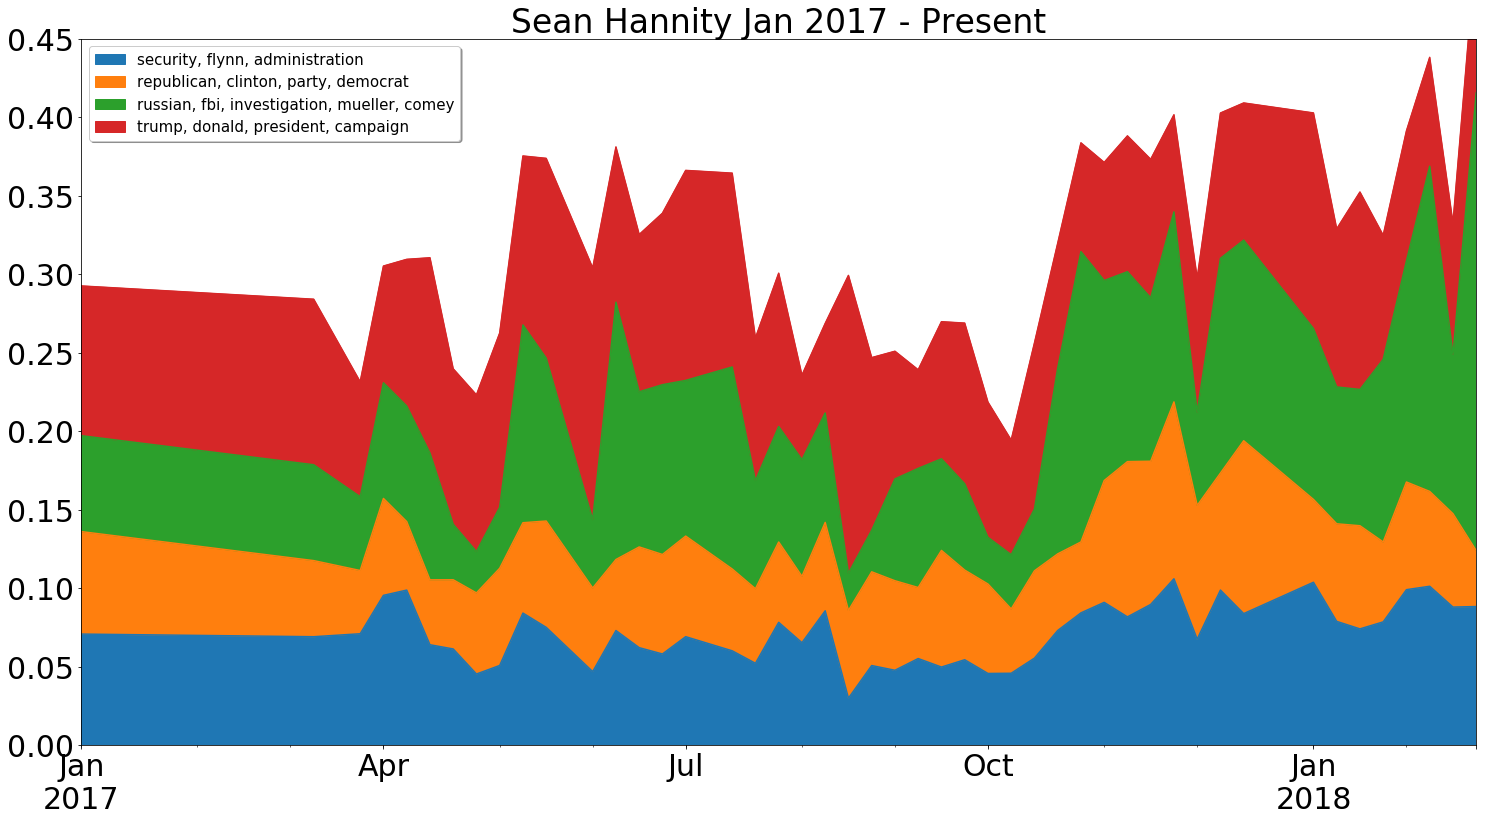

In [19]:
matplotlib.rc('xtick', labelsize=30)  
matplotlib.rc('ytick', labelsize=30) 
sean_topics.groupby(['Week']).mean().plot.area(figsize=(25,13))
plt.legend(loc='upper left', prop = {'size':15}, shadow=True)
plt.xlabel('')
plt.xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2018-02-20'))
plt.ylim((0,.45))
plt.title('Sean Hannity Jan 2017 - Present', fontdict={'size':33})

Text(0.5,1,'Rachel Maddow Jan 2017 - Present')

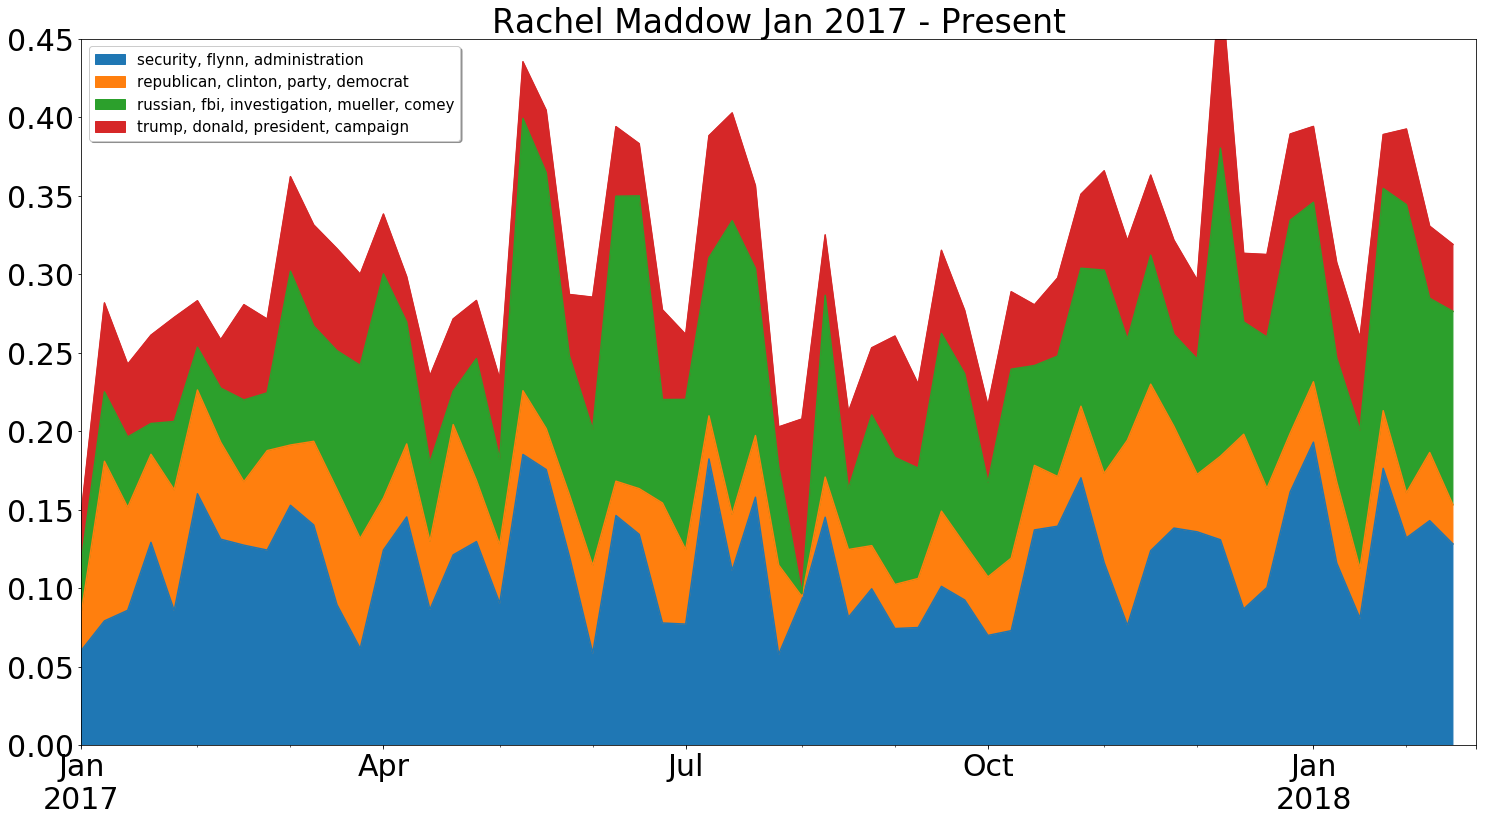

In [20]:
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 
rachel_topics.groupby(['Week']).mean().plot.area(figsize=(25,13))
plt.legend(loc='upper left', prop = {'size':15}, shadow=True)
plt.ylim((0,.45))
plt.xlabel('')
plt.xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2018-02-20'))
plt.title('Rachel Maddow Jan 2017 - Present', fontdict={'size':33})